In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (example: using CIFAR-10 dataset for illustration)
dataset, info = tfds.load('cifar10', with_info=True, as_supervised=True)

# Split dataset into training and validation sets
train_data, val_data = dataset['train'], dataset['test']

# Preprocessing function to normalize and resize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (32, 32))  # Resize image to 32x32 (CIFAR-10 standard)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image to [0, 1] and convert to float32
    return image, label

# Apply preprocessing to dataset
train_data = train_data.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

In [3]:
# Build a simple Convolutional Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),  # CIFAR-10 images have 32x32 resolution and 3 color channels
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

c:\Users\USER DK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
# Compile the model with a learning rate of 0.001
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary (including the number of parameters)
model.summary()

# Train the model (using 10 epochs for this example)
history = model.fit(train_data, epochs=10, validation_data=val_data)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3458 - loss: 1.7675 - val_accuracy: 0.5388 - val_loss: 1.3032
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5719 - loss: 1.2079 - val_accuracy: 0.6176 - val_loss: 1.0864
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6403 - loss: 1.0306 - val_accuracy: 0.6521 - val_loss: 1.0002
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6801 - loss: 0.9171 - val_accuracy: 0.6746 - val_loss: 0.9532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7122 - loss: 0.8307 - val_accuracy: 0.6836 - val_loss: 0.9270
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7358 - loss: 0.7572 - val_accuracy: 0.6917 - val_loss: 0.9194
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7570 - loss: 0.6967 - val_accuracy: 0.6912 - val_loss: 0.9392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7779 - loss: 0

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

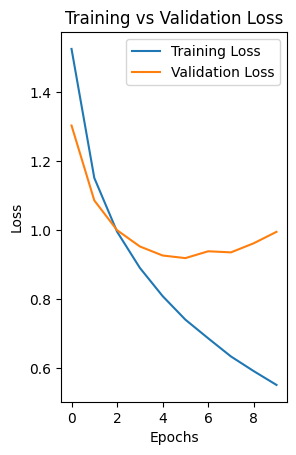

In [5]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

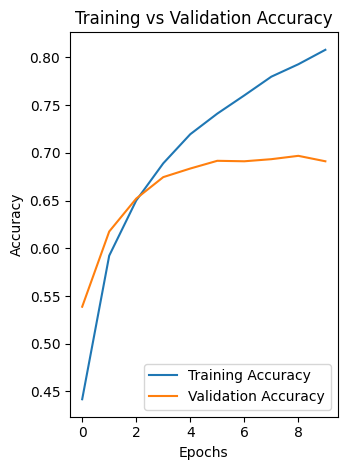

In [6]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Final evaluation on validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Final Validation Loss: {val_loss:.4f}')
print(f'Final Validation Accuracy: {val_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6916 - loss: 0.9875
Final Validation Loss: 0.9955
Final Validation Accuracy: 0.6912


In [8]:

# Mengimpor TensorBoard dan modul yang dibutuhkan
%load_ext tensorboard
import tensorflow as tf
import datetime


In [9]:

# Menyiapkan direktori log untuk TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [12]:

# Tambahkan `callbacks=[tensorboard_callback]` ke dalam `model.fit()` seperti ini:
# model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])


In [13]:

# Menjalankan TensorBoard
%tensorboard --logdir logs/fit
